This notebook consists of lab-tests done on the Minedojo environment such as observation manipulation and action-testing.

In [ ]:
import numpy as np
from skimage import data
from skimage.transform import resize_local_mean
import matplotlib.pyplot as plt

src_dim = (560, 512, 3)
target_dim = (64, 64, 3)

image = data.coffee()

image = resize_local_mean(image, (src_dim[0], src_dim[1], 3))

image.shape

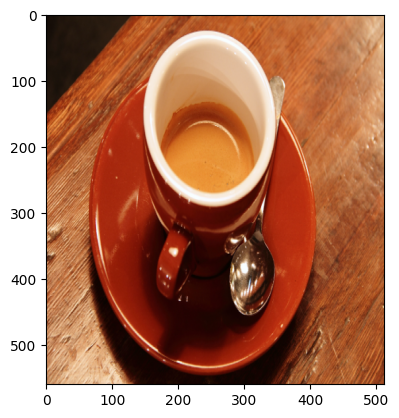

In [108]:
plt.imshow(image)

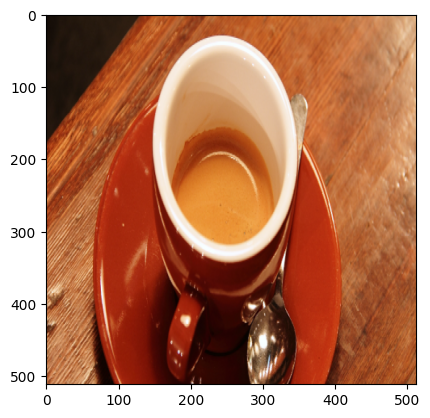

In [99]:
img_width = src_dim[1]
image = image[:img_width, :img_width]

plt.imshow(image)

In [89]:
%%time
#7 sek
from skimage.transform import resize

for _ in range(0, 1000):
    res_img = resize(image, (target_dim[0], target_dim[1]), anti_aliasing=True)

CPU times: user 5.22 s, sys: 155 ms, total: 5.37 s
Wall time: 5.54 s


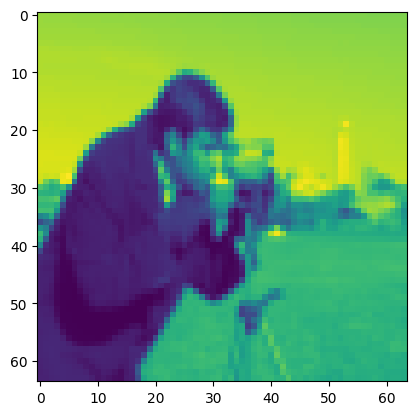

In [90]:
plt.imshow(res_img)


In [105]:
%%time

from skimage.transform import downscale_local_mean

for _ in range(0, 1000):
    res_img = downscale_local_mean(image, (8, 8, 1))

CPU times: user 720 ms, sys: 3.06 ms, total: 723 ms
Wall time: 742 ms


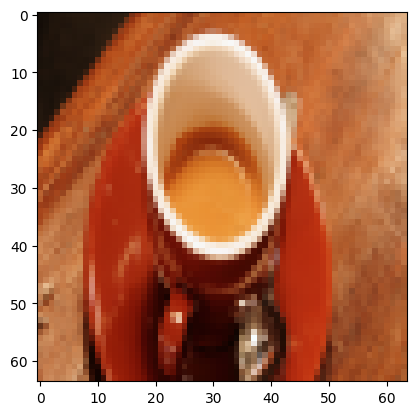

In [106]:
plt.imshow(res_img)
#image.shape

In [109]:
import math

def scale_image(image, method='downsample_local_mean'):
    source_shape = image.shape
    target_shape = (64, 64, 3)

    assert target_shape[0] == target_shape[1], "Target shape must be quadratic"

    # Image should always be quadratic, remove bottom of image by slicing
    slice_width = source_shape[1]
    image = image[:slice_width, :slice_width]

    if method == 'downsample_local_mean':
        sc_fc = math.floor(slice_width / target_shape[0])
        return downscale_local_mean(image, (sc_fc, sc_fc, 1))
    
sc_img = scale_image(image)

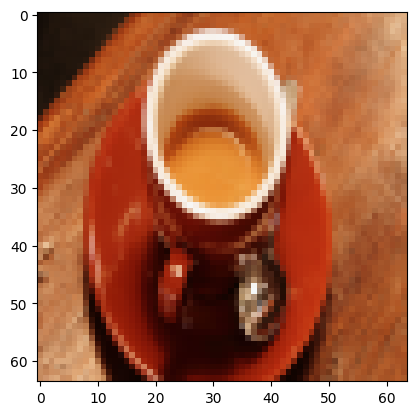

In [110]:
plt.imshow(sc_img)

In [1]:
from minedojo_wrapper import MinedojoActionWrapper
from minedojo_wrapper import MinedojoObservationWrapper
import minedojo

env = minedojo.make(task_id="harvest_milk", image_size=(560, 512))
env = MinedojoActionWrapper(env)
env = MinedojoObservationWrapper(env, target_size=(256, 256))

[INFO:minedojo.tasks] Loaded 1572 Programmatic tasks, 1558 Creative tasks, and 1 special task: "Playthrough". Totally 3131 tasks loaded.
/Users/kristian.aars/PycharmProjects/AICC504-SkyDreamerAI/venv/lib/python3.9/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


In [2]:
obs = env.reset()

[INFO:minedojo.tasks] Loaded 1572 Programmatic tasks, 1558 Creative tasks, and 1 special task: "Playthrough". Totally 3131 tasks loaded.


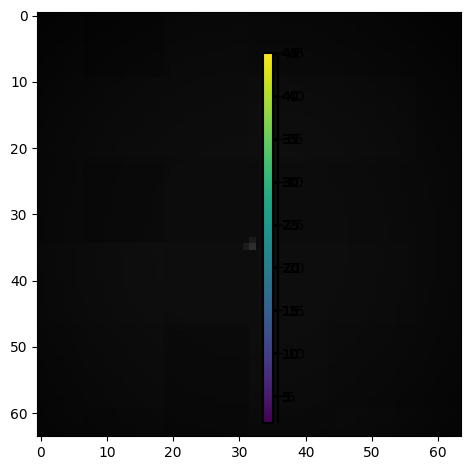

In [11]:
import cv2
import numpy as np
from skimage.io import imshow

for _ in range(0, 100):
    action = env.action_space.sample()
    next_obs, reward, done, info = env.step(action)
    imshow(next_obs)


In [6]:
import crafter

env_crafter = crafter.Env()  # Replace this with your Gym env.
obs_crafter = env_crafter.reset()


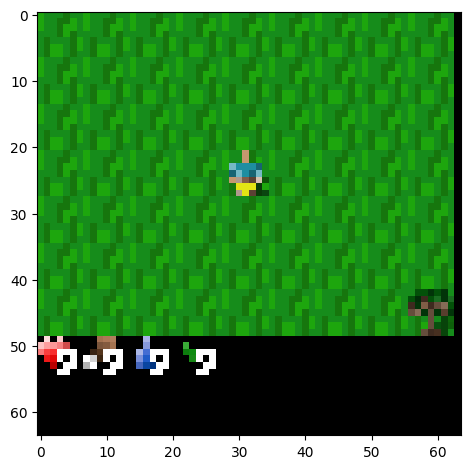

In [8]:
from skimage.io import imshow

imshow(obs_crafter)

In [11]:
env.action_space.sample()

5

In [2]:
from minedojo_wrapper import MinedojoSkyBlockEnv

env = MinedojoSkyBlockEnv(n_islands=512)

[INFO:minedojo.tasks] Loaded 1572 Programmatic tasks, 1558 Creative tasks, and 1 special task: "Playthrough". Totally 3131 tasks loaded.
/Users/kristian.aars/PycharmProjects/AICC504-SkyDreamerAI/venv/lib/python3.9/site-packages/numpy/core/numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


In [3]:
_ = env.reset()

[INFO:minedojo.tasks] Loaded 1572 Programmatic tasks, 1558 Creative tasks, and 1 special task: "Playthrough". Totally 3131 tasks loaded.


In [3]:
from skimage.io import imshow

for _ in range(0, 1000):
    action = env.action_space.sample()
    next_obs, reward, done, info = env.step(action)
    if info.get('ypos') < 0:
        _ = env.reset()
    #imshow(next_obs)


In [84]:
env.reset()

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  1,  0],
        [ 1,  1,  0],
        [ 1,  1,  0],
        ...,
        [ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0]],

       [[ 7, 10,  2],
        [ 8, 12,  3],
        [ 9, 12,  3],
        ...,
        [14, 20,  5],
        [13, 19,  5],
        [13, 18,  5]],

       ...,

       [[24, 29, 35],
        [25, 30, 37],
        [26, 31, 39],
        ...,
        [27, 31, 39],
        [26, 30, 37],
        [25, 29, 36]],

       [[24, 28, 34],
        [25, 29, 36],
        [26, 30, 37],
        ...,
        [26, 31, 38],
        [25, 29, 36],
        [24, 28, 35]],

       [[23, 27, 33],
        [24, 28, 35],
        [25, 29, 36],
        ...,
        [25, 29, 36],
        [24, 28, 35],
        [23, 27, 34]]], dtype=uint8)

In [139]:
next_obs, reward, done, info = env.step(0)
reward

1

In [12]:
actions = [
    "forward", "backward", "jump",
    "cam_pitch_l", "cam_pitch_r",
    "cam_yaw_up", "cam_yaw_down",
    "attack", "place",
    "craft_pickaxe", "craft_table", "craft_sticks", "craft_planks"
]

FORWARD = actions.index("forward")
BACKWARD = actions.index("backward")
CAM_PITCH_L = actions.index("cam_pitch_l")
CAM_PITCH_R = actions.index("cam_pitch_r")
CAM_YAW_UP = actions.index("cam_yaw_up")
CAM_YAW_DOWN = actions.index("cam_yaw_down")
ATTACK = actions.index("attack")
JUMP = actions.index("jump")
PLACE = actions.index("place")
CRAFT_PICKAXE = actions.index("craft_pickaxe")
CRAFT_TABLE = actions.index("craft_table")
CRAFT_STICKS = actions.index("craft_sticks")
CRAFT_PLANKS = actions.index("craft_planks")


key_to_act = {
    "w": FORWARD,
    "s": BACKWARD,
    " ": JUMP,
    "" : 99,
    "d": CAM_PITCH_R,
    "a": CAM_PITCH_L,
    "exit": -1,
    "reset": -2,
    "t":CAM_YAW_UP,
    "g": CAM_YAW_DOWN,
    "i": CRAFT_TABLE,
    "o":CRAFT_PLANKS,
    "e": ATTACK
}

while True:
    i = input()
    act = key_to_act[i]
    
    if act == -1:
        break
        
    if act == -2:
        _ = env.reset()
        continue
        
    next_obs, reward, done, info = env.step(act)

    print(reward)

0
0
0


In [10]:
key_to_act

from minedojo.sim.mc_meta.mc import ALL_CRAFT_SMELT_ITEMS

ALL_CRAFT_SMELT_ITEMS.index('planks')

29

In [8]:
ALL_CRAFT_SMELT_ITEMS

['blaze_powder',
 'book',
 'brick_block',
 'carpet',
 'carrot_on_a_stick',
 'chest_minecart',
 'clay',
 'crafting_table',
 'dye',
 'end_bricks',
 'end_rod',
 'ender_eye',
 'flint_and_steel',
 'furnace_minecart',
 'glowstone',
 'gold_nugget',
 'heavy_weighted_pressure_plate',
 'hopper_minecart',
 'iron_nugget',
 'iron_trapdoor',
 'leather',
 'lever',
 'light_weighted_pressure_plate',
 'lit_pumpkin',
 'magma',
 'magma_cream',
 'melon_seeds',
 'mossy_cobblestone',
 'nether_brick',
 'planks',
 'pumpkin_seeds',
 'purpur_block',
 'purpur_pillar',
 'quartz_block',
 'red_nether_brick',
 'red_sandstone',
 'redstone_torch',
 'sandstone',
 'shears',
 'slime_ball',
 'snow',
 'stick',
 'sticky_piston',
 'stone_button',
 'stone_pressure_plate',
 'stonebrick',
 'sugar',
 'tnt_minecart',
 'torch',
 'trapped_chest',
 'wheat',
 'wooden_button',
 'wooden_pressure_plate',
 'wool',
 'acacia_boat',
 'acacia_door',
 'acacia_fence',
 'acacia_fence_gate',
 'acacia_stairs',
 'activator_rail',
 'anvil',
 'armor_